# Chapter 4 NumPy Basics: Arrays and Vectorized  Computation

- Numpy stands for numerical python 
- other computational package use Numpy structure for data exchange 
Things like -
    - ndarray 
    - mathematical operation on entire array 
    - tools for reading and writing array data to disk 
    - linear algebra, random number generation, FT capabilities 
    - A C API connecting it to librarries written in C, JAVA ,FORTRAN
    
- topics that will be discussed are 
         - vectorised array operation (cleaning, subsetting and filtering, transformation)
         - algo like sorting, unique and set 
         - descriptive statistics and aggregating/summarizing data
         - data alaigning and murging hetrogeneous data 
         - converting conditinal statements to array xpression 
         - group based data manipulation

-  pandas also  provides some more domain-specific functionality like time series  manipulation, which is not present in NumPy.

#### Why Numpy is fast ?
- internally stores data in contigious memory block independent of other built in python objects. Numpy's library of algo written in c language can operate on this memory without dealing with other overhead. also use much less memory when compared with other pythn objects.
- performs complex operation without the need of python for loops

    

In [2]:
#comparison of numpy with 
import numpy as np 

In [3]:
my_arr = np.arange(1000000)

my_list = list(range(1000000))

In [4]:
%time for _ in range(10): my_arr2 = my_arr * 2

CPU times: user 19.8 ms, sys: 13.5 ms, total: 33.3 ms
Wall time: 30.5 ms


In [5]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 540 ms, sys: 159 ms, total: 699 ms
Wall time: 699 ms


NumPy-based algorithms are generally 10 to 100 times faster (or more)  than their pure Python counterparts and use significantly less memory.

## 4.1 The NumPy ndarray: A Multidimensional Array Object
- ndarray - fast, flexible container for large datasets in Python
- mathematical operation on whole block of data (batch computation) using easy syntax 
- multidimensional container for homogeneous    data
- array has shape and dtype, to confirm shape it has ndim, for type -  .dtype() 
        - shape = .shape
        - type = .dtype
        - diemensions = .ndim
        - np.zeros((shape)/value , dtype), np.zeros_like() , np.ones(), np.ones_like()
        - np.empty(shape), dtype), np.empty_like()
        - np.full(shape, val) , np.full_like()
        - np.eye(value) , np.identity()
        - np.arange(value) = array-valued version of the built-in Python range
        - array.astype(new_type) = casting 
                - Calling astype always creates a new array (a copy of the data), even if the new dtype is the same as the old dtype.
        - nparray does not copy data always specially when slicing
        

In [7]:
import numpy as np 

data = np.random.randn(2,3)
data

array([[-0.38821777, -0.34874534, -0.43431491],
       [ 0.45171051, -0.02320963, -0.6140418 ]])

In [8]:
data *10 


array([[-3.88217771, -3.48745342, -4.34314911],
       [ 4.51710515, -0.23209628, -6.14041797]])

In [9]:
data + data

array([[-0.77643554, -0.69749068, -0.86862982],
       [ 0.90342103, -0.04641926, -1.22808359]])

In [10]:
data.shape

(2, 3)

In [26]:
data.dtype

dtype('float64')

In [15]:
#Creating ndarrays
data1 = [1,2,3,4,5]

arr_1 = np.array(data1)
arr_1

array([1, 2, 3, 4, 5])

In [16]:
data2 = [[1,2,3,4,5],[6,7,8,9,10]]

arr_2 = np.array(data2)
arr_2

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [18]:
print(arr_2.ndim)
print(arr_2.shape)

2
(2, 5)


In [20]:
#datatype is selcted by numpy unless specified 
print(arr_1.dtype)
print(arr_2.dtype)

int64
int64


In [31]:
#other functions 
#In addition to np.array, there are a number of other functions for creating new arrays
print (np.zeros(10))

print(np.zeros((2,3,2)))

#It’s not safe to assume that np.empty will return an array of all zeros.        
#In some cases, it may return uninitialized “garbage” values.
print(np.empty((2,3))) 

print(np.ones((2,2)))

print(np.ones_like(arr_2)) 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]]
[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1.]
 [1. 1.]]
[[1 1 1 1 1]
 [1 1 1 1 1]]


In [32]:
np.full((2,3), 5)

array([[5, 5, 5],
       [5, 5, 5]])

In [33]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [35]:
#casting formr one form to another 
arr = np.array([1, 2, 3, 4, 5])
print(arr.dtype)

float_arr = arr.astype(np.float64)
print(float_arr)

int64
[1. 2. 3. 4. 5.]


## Arithmetic with NumPy Arrays
- vectorization - batch operations on data 
- comaprison between arrays return booleans 
- Evaluating operations between differently sized arrays is called broadcasting

In [37]:
arr = np.array ([[1,2,3,4],[5,6,7,8]])
arr

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [38]:
arr * arr

array([[ 1,  4,  9, 16],
       [25, 36, 49, 64]])

In [39]:
arr - arr 

array([[0, 0, 0, 0],
       [0, 0, 0, 0]])

In [40]:
1/arr

array([[1.        , 0.5       , 0.33333333, 0.25      ],
       [0.2       , 0.16666667, 0.14285714, 0.125     ]])

In [42]:
arr ** 0.5 

array([[1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712]])

In [45]:
arr2 = np.array([[0., 4., 1., 0.], [7., 2., 12., 3.]])

arr > arr2

array([[ True, False,  True,  True],
       [False,  True, False,  True]])

## Basic Indexing and Slicing


In [47]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [48]:
#indexing
print(arr [5])

#slicing 
print(arr[2:5])

#rewrite- update 
arr [2:5] = 12
print(arr)

5
[2 3 4]
[ 0  1 12 12 12  5  6  7  8  9]


In [53]:
#when we take a slice data is not copied but view is created
arr = np.arange(10)
arr_slice = arr[5:8]
print(arr_slice)

arr_slice[2] = 12
print(arr_slice, arr) #as you can see 12 is getting copied to both arr and arr_slice

#bare slice "[:]"
arr_slice[:] = 64
print(arr_slice, arr)

[5 6 7]
[ 5  6 12] [ 0  1  2  3  4  5  6 12  8  9]
[64 64 64] [ 0  1  2  3  4 64 64 64  8  9]


In [58]:
#create a copy of an array 
copy_arr = arr[5:8].copy()
copy_arr = 5
print(copy_arr)
print(arr) #when copied a new array got created and it did not affect the content in arr

5
[ 0  1  2  3  4 64 64 64  8  9]


In [60]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr2d[2])
print(arr2d[2][1])

[7 8 9]
8


In [68]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d[1]

array([[ 7,  8,  9],
       [10, 11, 12]])

In [64]:
#both scalar values and array can be assigned to arr3d[1]
arr3d[1] = 90
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[90, 90, 90],
        [90, 90, 90]]])

In [69]:
#both scalar values and array can be assigned to arr3d[1]
old_values = arr3d[1].copy()


arr3d[1] = 90 #scalar 
print("after scalar assignment:", arr3d)

arr3d[1] = old_values
print("after array assignment:", arr3d )

after scalar assignment: [[[ 1  2  3]
  [ 4  5  6]]

 [[90 90 90]
  [90 90 90]]]
after array assignment: [[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [72]:
arr3d[1,1] #in all the section we have seen the views and not the array getting copied. in case if we change anything in view it will affect the actual data

array([10, 11, 12])

### indexing with slices 

In [73]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [74]:
arr[5:8]

array([64, 64, 64])

In [75]:
arr2d 

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [77]:
#fetch 5 
arr2d[1][1]

5

In [82]:
arr2d[1:][1:]

array([[7, 8, 9]])

In [80]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [83]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [84]:
print(arr2d[:2, 1:])

[[2 3]
 [5 6]]


In [85]:
print(arr2d[2])
print(arr2d[2:, :])
print(arr2d[2,:])

[7 8 9]
[[7 8 9]]
[7 8 9]


In [86]:
arr2d[:, :2]

array([[1, 2],
       [4, 5],
       [7, 8]])

In [87]:
print(arr2d[1, :2])
print(arr2d[1:2, :2])

[4 5]
[[4 5]]


### boolean Indexing 
- use one array to use as an indexing for another array 
- should have same length
- ~ operator can be useful when you want to invert a general condition
- != can be ude for the same purpose as well ~
- Selecting data from an array by boolean indexing always creates a __copy__ of the data, even if the      returned array is unchanged. Also to combine multiple boolean conditions use __& / |__ instead of __and / or__

In [93]:
names = np.array(['bob' , 'joe', 'will' , 'bob', 'will','joe' , 'joe'])

data = np.random.randn(7,4)
data

array([[ 0.15584954, -0.69544096,  1.82912877,  1.43432235],
       [ 0.272016  ,  0.73260896, -0.65750378,  0.44138413],
       [ 0.54015747, -1.37280289,  0.44895163, -1.696055  ],
       [-0.72449588,  0.44859054, -0.11887529, -0.47799493],
       [ 0.81048965, -1.35301071,  0.83562149, -1.26311331],
       [ 0.55247463, -0.13011461,  0.47422158,  0.30740204],
       [ 0.71252124,  0.84065348,  0.3571797 , -0.30709881]])

In [94]:
names

array(['bob', 'joe', 'will', 'bob', 'will', 'joe', 'joe'], dtype='<U4')

In [95]:
names == 'bob'

array([ True, False, False,  True, False, False, False])

In [96]:
data[names == 'bob']

array([[ 0.15584954, -0.69544096,  1.82912877,  1.43432235],
       [-0.72449588,  0.44859054, -0.11887529, -0.47799493]])

In [98]:
#to select everything but bob 
names != 'bob'
data[names!= 'bob']

array([[ 0.272016  ,  0.73260896, -0.65750378,  0.44138413],
       [ 0.54015747, -1.37280289,  0.44895163, -1.696055  ],
       [ 0.81048965, -1.35301071,  0.83562149, -1.26311331],
       [ 0.55247463, -0.13011461,  0.47422158,  0.30740204],
       [ 0.71252124,  0.84065348,  0.3571797 , -0.30709881]])

In [99]:
data[~(names == 'bob')]

array([[ 0.272016  ,  0.73260896, -0.65750378,  0.44138413],
       [ 0.54015747, -1.37280289,  0.44895163, -1.696055  ],
       [ 0.81048965, -1.35301071,  0.83562149, -1.26311331],
       [ 0.55247463, -0.13011461,  0.47422158,  0.30740204],
       [ 0.71252124,  0.84065348,  0.3571797 , -0.30709881]])

In [106]:
#selecting two or three names to combine multiple values 
cond = (names == 'bob') | (names=='bob')
data[cond, :2]

array([[ 0.15584954, -0.69544096],
       [-0.72449588,  0.44859054]])

In [107]:
#setting values with boolean arrays
data[data < 0] = 0
data

array([[0.15584954, 0.        , 1.82912877, 1.43432235],
       [0.272016  , 0.73260896, 0.        , 0.44138413],
       [0.54015747, 0.        , 0.44895163, 0.        ],
       [0.        , 0.44859054, 0.        , 0.        ],
       [0.81048965, 0.        , 0.83562149, 0.        ],
       [0.55247463, 0.        , 0.47422158, 0.30740204],
       [0.71252124, 0.84065348, 0.3571797 , 0.        ]])

In [109]:
data[names == 'bob'] = 0
data

array([[0.        , 0.        , 0.        , 0.        ],
       [0.272016  , 0.73260896, 0.        , 0.44138413],
       [0.54015747, 0.        , 0.44895163, 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.81048965, 0.        , 0.83562149, 0.        ],
       [0.55247463, 0.        , 0.47422158, 0.30740204],
       [0.71252124, 0.84065348, 0.3571797 , 0.        ]])

### fancy indexing 
- Fancy indexing is a term adopted by NumPy to describe indexing using integer      arrays or lists.
- Fancy indexing, unlike slicing, always copies      the data into a new array.

In [112]:
arr = np.empty((8,4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [113]:
#subsetting array in particular order 
arr[[0,2,6,3]]

array([[0., 0., 0., 0.],
       [2., 2., 2., 2.],
       [6., 6., 6., 6.],
       [3., 3., 3., 3.]])

In [114]:
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [116]:
#passing mulyiple array 
arr= np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [119]:
#passing multiple index orders 
arr[[1,5,7,2],[0,3,1,2]] #(1, 0), (5, 3), (7, 1), and (2, 2) 
#the result of fancy indexing with multiple integer arrays is always one-dimensional.

array([ 4, 23, 29, 10])

### Transposing Arrays and Swapping Axes
- Transposing is a special form of reshaping that similarly returns a view on the underlying data without copying anythin
- *return a view, reshapes data* 
- you have transpose method and also the special T attribute
- swapaxes similarly returns a      view on the data without making a copy.

In [121]:
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [122]:
arr.T #reshapes data and creates a view 

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [123]:
#when computing the inner matrix product using np.dot
np.dot(arr, arr.T)

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [133]:
arr = np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [128]:
arr.transpose((1,0,2)) 

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [134]:
arr.swapaxes(1,0)

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

# 4.2 Universal Functions: Fast Element-Wise Array Functions

= performs    element-wise operations on data in ndarrays.
- unary ufunc - takes one input - np.exp() , np.sqrt()
- binary ufunc - takes multiple inputs - np.add(), np.maximum()

- does not changes the array unless the out argument is specified (i.e. in case of ufunc)

In [155]:
#element wise transformation 
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [156]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [157]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [158]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [139]:
x = np.random.randn(8)
y = np.random.randn(8)

In [140]:
x

array([-1.45555254, -0.34423343, -0.22085801, -0.34823253, -0.09489496,
        0.50323503, -0.16167136, -1.58566844])

In [141]:
y

array([ 2.30371488,  0.34868263,  1.2031869 ,  1.47155316,  0.64703437,
       -0.54539212,  1.11924954,  0.7951333 ])

In [144]:
np.maximum(x,y)

array([2.30371488, 0.34868263, 1.2031869 , 1.47155316, 0.64703437,
       0.50323503, 1.11924954, 0.7951333 ])

In [148]:
#not commmon - ufunch canreturn multiple arrays 
arr = np.random.randn(7)*5
print(arr)

remainder, whole_part = np.modf(arr)
print('remainder:', remainder)
print('whole_part:', whole_part)

[-6.27003412  7.34576705  1.51728952  0.24667135  3.88550805  6.47389022
  1.46626268]
remainder: [-0.27003412  0.34576705  0.51728952  0.24667135  0.88550805  0.47389022
  0.46626268]
whole_part: [-6.  7.  1.  0.  3.  6.  1.]


In [149]:
# ufunc - optional out argument that allows them to operate in-place
arr = np.random.randn(8)
arr

array([-0.03814486, -0.07899226,  0.26052835,  0.26939844, -1.02317517,
        1.93924641,  3.23512321,  1.64832238])

In [152]:
np.sqrt(arr,arr)


array([       nan,        nan, 0.84524357, 0.8487883 ,        nan,
       1.08631087, 1.15807411, 1.06446226])

In [154]:
arr #out argurment changes the in place array 

array([       nan,        nan, 0.84524357, 0.8487883 ,        nan,
       1.08631087, 1.15807411, 1.06446226])

# 4.3 Array-Oriented Programming with Arrays

- practice of replacing explicit loops with array expressions is    commonly referred to as vectorization
- broadcasting, a powerful method for vectorizing computations.

In [160]:
# wished to evaluate the function sqrt(x^2 + y^2) across a regular grid of values
points = np.arange(-5,5,0.01)
 
#two 1D arrays and produces two 2D matrices corresponding to all pairs of (x, y) in    the two arrays:    
xs, ys = np.meshgrid(points,points)
ys 

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [161]:
z = np.sqrt(xs **2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

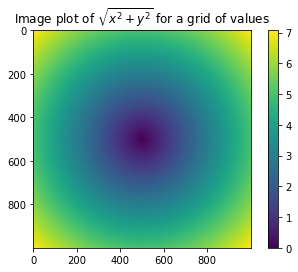

In [163]:
import matplotlib.pyplot as plt 
plt.imshow(z)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

## Expressing Conditional Logic as Array Operations


- numpy.where() = x if condition else y

In [164]:
xarr = np.array([1.1,1.2,1.3,1.4,1.5])
yarr = np.array([2.1,2.2,2.3,2.4,2.5])
cond = [True , False, True, False, False]

In [165]:
result = [x if c else y for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 2.4, 2.5]

In [168]:
result1 = np.where(cond, xarr, yarr)
result1

array([1.1, 2.2, 1.3, 2.4, 2.5])

In [169]:
# Suppose you had a matrix of randomly generated data and you wanted to replace all positive values      
#with 2 and all negative values with –2. This is very easy to do with np.where:

arr = np.random.randn(4,4)
arr

array([[ 1.97466491,  0.07592994,  1.09146874,  2.94410883],
       [-0.12808539,  0.272626  , -0.07777811,  0.18021182],
       [ 0.41159264, -0.84329716, -1.66750163,  1.41972038],
       [-0.76816085,  0.64182422,  0.27866221,  0.69067945]])

In [170]:
np.where(arr>0, 2,-2)

array([[ 2,  2,  2,  2],
       [-2,  2, -2,  2],
       [ 2, -2, -2,  2],
       [-2,  2,  2,  2]])

In [171]:
#you can combine scalar and arrays as well in np.where
np.where(arr>0, 2, arr)

array([[ 2.        ,  2.        ,  2.        ,  2.        ],
       [-0.12808539,  2.        , -0.07777811,  2.        ],
       [ 2.        , -0.84329716, -1.66750163,  2.        ],
       [-0.76816085,  2.        ,  2.        ,  2.        ]])

## Mathematical and Statistical Methods


- compute statistics 
- called as aggrgation (or reductions)
- can often be called using np. or as a mathod directly to an array

In [173]:
arr = np.random.randn(5,4)

In [174]:
arr

array([[ 2.21181079,  1.31817939,  0.67172212,  0.11217146],
       [ 0.4325655 , -0.66046509, -0.012042  , -0.58545599],
       [-1.03258772,  0.3467361 ,  2.63959648, -1.41284806],
       [-0.63479867,  0.95194244, -0.50188485,  1.82813013],
       [-1.50617063,  0.93113073, -1.05705488, -1.36679383]])

In [175]:
arr.mean()

0.13369417077209733

In [176]:
np.mean(arr)

0.13369417077209733

In [177]:
arr.max()

2.639596480147089

In [178]:
np.max(arr)

2.639596480147089

In [179]:
# functions like mean and sum takes optional axis argument 
np.mean(arr, axis=0)

array([-0.10583615,  0.57750471,  0.34806737, -0.28495926])

In [180]:
arr.mean(axis =0) #axis 0 - across rows 
#axis 1 - across columns

array([-0.10583615,  0.57750471,  0.34806737, -0.28495926])

In [193]:
# cumsum and cumprod - do not aggregate rahter produce array of intermediate results 
arr = np.arange(10)
np.cumsum(arr)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [195]:
sum(arr)

45

In [196]:
arr.sum()

45

In [202]:
arr = np.array([[0, 1, 2], [3, 19, 5], [6, 7, 8]])
arr

array([[ 0,  1,  2],
       [ 3, 19,  5],
       [ 6,  7,  8]])

In [203]:
np.cumsum(arr)

array([ 0,  1,  3,  6, 25, 30, 36, 43, 51])

In [204]:
arr.cumsum( axis = 0)

array([[ 0,  1,  2],
       [ 3, 20,  7],
       [ 9, 27, 15]])

In [205]:
arr.argmax()

4

### Basic array statistical methods 
- arr.sum() - calculates sum __can also be written in the form of np.sum(arr)__ 
- arr.mean() - mean 
- arr.std() - std 
- arr.var() - variance 
- arr.min()
- arr.max()
- arr.argmax() - index of max value 
- arr.argmin()
- arr.cumprod()
- arr.cumsum()

### Methods for boolean arrays 
- Boolean values are coerced to 1 (True) and 0 (False) in the preceding methods. Thus, sum is often used as a means of counting True values in a boolean array
- boolean array expressions are written before the methods to find desired results 
- other methods - .any() , .all()

In [209]:
arr = np.random.randn(100)
(arr > 0).sum() #46 positive values  --- > can also be expressed as np.sum(arr>0)

46

In [207]:
bools = np.array([False, False, True, False])

np.any(bools) #bools.any()

True

In [208]:
np.all(bools) #bools.all()

False

### sorting 
- like list, numpy array can be sorted in place 
- .sort() - alters the current array 
- np.sort() - creates a physical copy of array 

In [211]:
arr = np.random.randn(6)
arr

array([-0.27317946, -0.68040877,  0.15909253, -1.53352407, -2.29931321,
        0.63098803])

In [213]:
arr.sort()
arr

array([-2.29931321, -1.53352407, -0.68040877, -0.27317946,  0.15909253,
        0.63098803])

In [214]:
arr = np.random.randn(5, 3)
arr

array([[-1.25089752,  0.01672075,  0.8876922 ],
       [-0.26927752,  0.20976381,  0.19809781],
       [ 1.56147807, -0.53606261,  0.6163867 ],
       [-1.45504439,  1.74751088,  0.06443153],
       [ 0.39685069,  1.67497486, -0.43660145]])

In [217]:
arr.sort(1)
arr

array([[-1.25089752,  0.01672075,  0.8876922 ],
       [-0.26927752,  0.19809781,  0.20976381],
       [-0.53606261,  0.6163867 ,  1.56147807],
       [-1.45504439,  0.06443153,  1.74751088],
       [-0.43660145,  0.39685069,  1.67497486]])

In [218]:
arr = np.random.randn(6)
print(arr)
arr2 =np.sort(arr)      #returns a sorted copy of an array instead of modyfying the arr 
print(arr)
print(arr2)

[ 0.89688388  0.1894677   1.02285212 -2.27262546  1.97711823  0.93084402]
[ 0.89688388  0.1894677   1.02285212 -2.27262546  1.97711823  0.93084402]
[-2.27262546  0.1894677   0.89688388  0.93084402  1.02285212  1.97711823]


### Unique and Other Set Logic
- numpy has some bsic set operationn for 1d array 
- np.unique(val) - alternative sorted(sort(val))
- np.in1d,      tests membership of the values in one array in another 
- other array set opearations:
        - unique(x)  = Compute the sorted, unique elements in x
        - intersect1d(x, y) = Compute the sorted, common elements in x and y
        - union1d(x, y) = Compute the sorted union of 
        - in1d(x, y) = Compute a boolean array indicating whether each element of x is contained in y elements
        - setdiff1d(x, y) = Set difference, elements in x that are not in y
        - setxor1d(x, y) = Set symmetric differences; elements that are in either of the arrays, but not both

In [220]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [221]:
#python alternative
sorted(set(names))

['Bob', 'Joe', 'Will']

In [223]:
np.in1d(names, ['Bob','Will'])

array([ True, False,  True,  True,  True, False, False])

# 4.4 File Input and Output with Arrays
- NumPy is able to save and load data to and from disk either in text or binary format. 
- people prefer pandas 
- np.save(filename, arr)
- np.load(filename, arr)
- np.savez(filename, arr) #you can save 1 or more arrays by specifying a and b arguments 
- np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

In [224]:
arr = np.arange(10)
np.save('some_array', arr) #file will be saved with .npy extension 

In [225]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [227]:
#save multiple arrays in an uncompressed archive using np.savez
np.savez('some_array1.npz' , a =arr , b= arr)
np.load('some_array1.npz') #loadz individual array lazily

In [231]:
np.load('some_array1.npz')['a']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# 4.5 Linear Algebra 
- Linear algebra, like matrix multiplication, decompositions, determinants, and other square matrix math, is an important part of any array library

In [232]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [233]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [234]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [236]:
x.dot(y) #can also be written as np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [237]:
#@ symbol 
x @ np.ones(3)

array([ 6., 15.])

In [245]:
#numpy.linalg has a standard set of matrix decompositions and things like inverse and determinant.
from numpy.linalg import inv , qr 
X = np.random.randn(5,5)
X

array([[ 0.18355806, -2.10594579,  0.15058048,  0.36649193,  0.10102009],
       [ 1.16628028, -0.97432917,  0.28471279, -1.16511503, -0.35267722],
       [-1.22660071,  0.55396811, -1.22199469,  0.0188558 ,  0.97105466],
       [-0.84966446,  1.15069046,  0.22826223, -0.37039621, -0.28894453],
       [-1.89423071,  1.4299965 ,  1.39128332,  0.71048161, -0.08433353]])

In [249]:
mat  = X.T.dot(X) #X.T.dot(X) computes the dot product of X with its transpose X.T

In [247]:
mat

array([[ 7.20849222, -5.88884597, -0.97076317, -2.34581026, -1.1786207 ],
       [-5.88884597,  9.06018422,  0.98072506,  0.96361377,  0.21573181],
       [-0.97076317,  0.98072506,  3.58477981,  0.60435544, -1.45511066],
       [-2.34581026,  0.96361377,  0.60435544,  2.13414238,  0.51334913],
       [-1.1786207 ,  0.21573181, -1.45511066,  0.51334913,  1.16813452]])

In [250]:
inv(mat)

array([[ 1.36919786,  0.66489541,  1.30417387,  0.15869103,  2.81352807],
       [ 0.66489541,  0.44573913,  0.54602216,  0.07802607,  1.23441899],
       [ 1.30417387,  0.54602216,  2.34421978, -0.52727914,  4.36688531],
       [ 0.15869103,  0.07802607, -0.52727914,  0.98405513, -0.94356385],
       [ 2.81352807,  1.23441899,  4.36688531, -0.94356385,  9.32123646]])

In [251]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  1.37038342e-15, -2.07127143e-16,
         3.25473779e-16,  5.14777126e-15],
       [ 1.10811761e-16,  1.00000000e+00,  1.17297774e-15,
        -1.47513355e-17, -1.47950218e-15],
       [ 6.22666292e-16, -2.05168500e-16,  1.00000000e+00,
         9.85459858e-17, -9.51085415e-16],
       [-8.85814652e-17, -3.42170291e-16,  6.16082851e-16,
         1.00000000e+00,  1.30516472e-16],
       [ 1.74706036e-16,  1.85664048e-16,  3.85650923e-16,
        -2.39968603e-16,  1.00000000e+00]])

In [253]:
q, r = qr(mat) #Compute the QR decomposition
r

array([[-9.71983645, 10.21318651,  1.64156358,  2.96119706,  1.12501162],
       [ 0.        , -3.79383443, -0.42721014,  1.30176556,  0.8632578 ],
       [ 0.        ,  0.        , -3.78948574, -0.42926208,  1.77544445],
       [ 0.        ,  0.        ,  0.        , -0.98344612, -0.09711791],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.09273375]])

In [254]:
r

array([[-9.71983645, 10.21318651,  1.64156358,  2.96119706,  1.12501162],
       [ 0.        , -3.79383443, -0.42721014,  1.30176556,  0.8632578 ],
       [ 0.        ,  0.        , -3.78948574, -0.42926208,  1.77544445],
       [ 0.        ,  0.        ,  0.        , -0.98344612, -0.09711791],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.09273375]])

## 4.6 Pseudorandom Number Generation


In [257]:
samples = np.random.normal(size = (4,4))
samples

array([[-0.50690038, -1.32776312,  0.2092361 , -0.13584988],
       [-1.0698351 ,  0.57781464, -1.52506069, -0.69121993],
       [-0.062964  , -0.42768846,  0.53247672, -0.62598895],
       [-0.10430917, -0.81177046,  0.00814107,  0.32216918]])

In [258]:
#pseudorandom - generated by an algorithm with deterministic behavior based on the seed of the random number generator

In [259]:
#to change numpy's random seed 
np.random.seed(1234)

In [260]:
#numpy.random  use global random seed generator to avoid this you can use numpy.random.RandomState
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

In [262]:
np.random.randn(10) # same seesd was used a before 

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])